# GentrificationPy
----

#### Note
* This code cleans the student population and enrollment data.

In [4]:
# Dependencies
import pandas as pd

In [5]:
# load CSV
csv_path = "landscape-diversity-data.xlsx"

In [6]:
# Read with pandas into dataframe
student_df = pd.read_excel(csv_path, encoding = 'iso-8859-1')

# Inspect all columns
list(student_df.columns)

['School ID',
 'School name',
 'Sector',
 'Grade band',
 'School Ward, 2016-17',
 'Opening or closing schools',
 'Racial and ethnic diversity score, 2014-15',
 'Racial and ethnic diversity score, 2016-17',
 'Most racially and ethnically diverse, 2016-17',
 'Economic diversity score, 2014-15',
 'Economic diversity score, 2016-17',
 'Most economically diverse, 2016-17',
 'Percent African American, 2014-15',
 'Percent Latino, 2014-15',
 'Percent white, 2014-15',
 'Percent other, 2014-15',
 'Plurality race or ethnicity, 2014-15',
 'Percent African American, 2016-17',
 'Percent Latino, 2016-17',
 'Percent white, 2016-17',
 'Percent other, 2016-17',
 'Plurality race or ethnicity, 2016-17',
 'Percent at-risk, 2014-15',
 'Percent not at-risk, 2014-15',
 'Plurality economic group, 2014-15',
 'Percent at-risk, 2016-17',
 'Percent not at-risk, 2016-17',
 'Plurality economic group, 2016-17',
 'Boundary participation rate, 2016-17',
 'Enrollment in PK-12, 2014-15',
 'School address, 2016-17',
 'Lat

In [7]:
# Select subset of student data  
sub_student_df = student_df.iloc[:,[1, 2, 3, 4, 12, 13, 14, 15, 17, 18, 19, 20, 29, 33, 43, 45, 46]]
sub_student_df.head()

,School name,Sector,Grade band,"School Ward, 2016-17","Percent African American, 2014-15","Percent Latino, 2014-15","Percent white, 2014-15","Percent other, 2014-15","Percent African American, 2016-17","Percent Latino, 2016-17","Percent white, 2016-17","Percent other, 2016-17","Enrollment in PK-12, 2014-15","Enrollment in PK-12, 2016-17","Percent living in Ward of school, 2016-17","Change in race and ethnicity plurality group, 2014-15 to 2016-17","Change in economic plurality group, 2014-15 to 2016-17"
0,Achievement Preparatory Academy PCS Wahler Pla...,Charter,Elementary,Ward 8,1.00,0.00,NaN,0.00,0.968,0.017,0.011,0.004,267.0,464.0,0.760776,0.0,1.0
1,Achievement Preparatory Academy PCS Wahler Pla...,Charter,Middle,Ward 8,0.99,0.00,NaN,0.00,0.968,0.028,NaN,0.004,381.0,468.0,0.762821,0.0,0.0
2,Aiton ES,DCPS,Elementary,Ward 7,1.00,NaN,0.00,0.00,0.996,0.004,NaN,0.000,262.0,251.0,0.896414,0.0,0.0
3,Amidon Bowen ES,DCPS,Elementary/Middle,Ward 6,0.88,0.05,0.03,0.03,0.877,0.040,0.046,0.037,345.0,350.0,0.751429,0.0,0.0
4,Anacostia HS,DCPS,High,Ward 8,1.00,NaN,0.00,0.00,0.989,0.007,NaN,0.004,661.0,449.0,0.636971,0.0,0.0


### Reorganize and rename the columns

In [8]:
# sum non-white percentages for 2014-15 and 2016-17

sub_student_df = sub_student_df.copy()  

sub_student_df['% Non-white 2014-15'] = sub_student_df['Percent African American, 2014-15']\
                                   + sub_student_df['Percent Latino, 2014-15']\
                                   + sub_student_df['Percent other, 2014-15']

sub_student_df['% Non-white 2016-17'] = sub_student_df['Percent African American, 2016-17']\
                                   + sub_student_df['Percent Latino, 2016-17']\
                                   + sub_student_df['Percent other, 2016-17']              


#relable column headers
sub_student_df.rename(columns={"School Ward, 2016-17": "School Ward 2016-17",
                              "Percent white, 2014-15": "% White 2014-15",
                              "Percent white, 2016-17": "% White 2016-17",
                              "Enrollment in PK-12, 2014-15":"PK-12 Enrollment 2014-15", 
                              "Enrollment in PK-12, 2016-17":"PK-12 Enrollment 2016-17", 
                              "Percent living in Ward of school, 2016-17":"% living in School Ward 2016-17", 
                              "Change in race and ethnicity plurality group, 2014-15 to 2016-17": 
                              "% Change in Race/Ethnic Group between 2014-15 and 2016-17",
                              "Change in economic plurality group, 2014-15 to 2016-17":
                              "% Change in Economic Group between 2014-15 and 2016-17"}, inplace = True)

#preview data
sub_student_df.head()

,School name,Sector,Grade band,School Ward 2016-17,"Percent African American, 2014-15","Percent Latino, 2014-15",% White 2014-15,"Percent other, 2014-15","Percent African American, 2016-17","Percent Latino, 2016-17",% White 2016-17,"Percent other, 2016-17",PK-12 Enrollment 2014-15,PK-12 Enrollment 2016-17,% living in School Ward 2016-17,% Change in Race/Ethnic Group between 2014-15 and 2016-17,% Change in Economic Group between 2014-15 and 2016-17,% Non-white 2014-15,% Non-white 2016-17
0,Achievement Preparatory Academy PCS Wahler Pla...,Charter,Elementary,Ward 8,1.00,0.00,NaN,0.00,0.968,0.017,0.011,0.004,267.0,464.0,0.760776,0.0,1.0,1.00,0.989
1,Achievement Preparatory Academy PCS Wahler Pla...,Charter,Middle,Ward 8,0.99,0.00,NaN,0.00,0.968,0.028,NaN,0.004,381.0,468.0,0.762821,0.0,0.0,0.99,1.000
2,Aiton ES,DCPS,Elementary,Ward 7,1.00,NaN,0.00,0.00,0.996,0.004,NaN,0.000,262.0,251.0,0.896414,0.0,0.0,NaN,1.000
3,Amidon Bowen ES,DCPS,Elementary/Middle,Ward 6,0.88,0.05,0.03,0.03,0.877,0.040,0.046,0.037,345.0,350.0,0.751429,0.0,0.0,0.96,0.954
4,Anacostia HS,DCPS,High,Ward 8,1.00,NaN,0.00,0.00,0.989,0.007,NaN,0.004,661.0,449.0,0.636971,0.0,0.0,NaN,1.000


In [9]:
#create new data frame with revised columns
new_student_df=sub_student_df[['School Ward 2016-17', 'Sector', 'School name', 'Grade band', '% Non-white 2014-15',
                              '% White 2014-15','% Non-white 2016-17','% White 2016-17','PK-12 Enrollment 2014-15', 
                              'PK-12 Enrollment 2016-17','% living in School Ward 2016-17',
                              '% Change in Race/Ethnic Group between 2014-15 and 2016-17',
                              '% Change in Economic Group between 2014-15 and 2016-17']]

#reset dataframe index
new_student_df = new_student_df.reset_index(drop=True)

#preview data
new_student_df.head()

,School Ward 2016-17,Sector,School name,Grade band,% Non-white 2014-15,% White 2014-15,% Non-white 2016-17,% White 2016-17,PK-12 Enrollment 2014-15,PK-12 Enrollment 2016-17,% living in School Ward 2016-17,% Change in Race/Ethnic Group between 2014-15 and 2016-17,% Change in Economic Group between 2014-15 and 2016-17
0,Ward 8,Charter,Achievement Preparatory Academy PCS Wahler Pla...,Elementary,1.00,NaN,0.989,0.011,267.0,464.0,0.760776,0.0,1.0
1,Ward 8,Charter,Achievement Preparatory Academy PCS Wahler Pla...,Middle,0.99,NaN,1.000,NaN,381.0,468.0,0.762821,0.0,0.0
2,Ward 7,DCPS,Aiton ES,Elementary,NaN,0.00,1.000,NaN,262.0,251.0,0.896414,0.0,0.0
3,Ward 6,DCPS,Amidon Bowen ES,Elementary/Middle,0.96,0.03,0.954,0.046,345.0,350.0,0.751429,0.0,0.0
4,Ward 8,DCPS,Anacostia HS,High,NaN,0.00,1.000,NaN,661.0,449.0,0.636971,0.0,0.0


### Sort #1: sort data by ward and sector


In [10]:
#sort student data by ward and sector
sorted_ward_sector = new_student_df.sort_values(['School Ward 2016-17','Sector']).reset_index(drop=True)

#preview data
sorted_ward_sector.head()

,School Ward 2016-17,Sector,School name,Grade band,% Non-white 2014-15,% White 2014-15,% Non-white 2016-17,% White 2016-17,PK-12 Enrollment 2014-15,PK-12 Enrollment 2016-17,% living in School Ward 2016-17,% Change in Race/Ethnic Group between 2014-15 and 2016-17,% Change in Economic Group between 2014-15 and 2016-17
0,Ward 1,Charter,AppleTree Early Learning Center PCS Columbia H...,Early Childhood,0.79,0.21,0.839,0.163,163.0,160.0,0.487500,0.0,0.0
1,Ward 1,Charter,Cesar Chavez PCS for Public Policy Chavez Prep,Middle/High,1.00,NaN,0.996,0.003,331.0,306.0,0.526144,0.0,0.0
2,Ward 1,Charter,District of Columbia International School,Middle/High,0.87,0.13,0.851,0.150,210.0,520.0,0.225000,0.0,0.0
3,Ward 1,Charter,EL Haynes PCS Middle School,Middle,0.95,0.05,0.980,0.020,377.0,348.0,0.227011,1.0,0.0
4,Ward 1,Charter,Howard University Middle School of Mathematics...,Middle,1.00,0.00,1.000,NaN,294.0,278.0,0.111511,0.0,0.0


In [11]:
# Remove rows with missing data
clean_ward_sector_df = sorted_ward_sector.dropna(how="any")

#review column row counts
clean_ward_sector_df.count()

School Ward 2016-17                                          90
Sector                                                       90
School name                                                  90
Grade band                                                   90
% Non-white 2014-15                                          90
% White 2014-15                                              90
% Non-white 2016-17                                          90
% White 2016-17                                              90
PK-12 Enrollment 2014-15                                     90
PK-12 Enrollment 2016-17                                     90
% living in School Ward 2016-17                              90
% Change in Race/Ethnic Group between 2014-15 and 2016-17    90
% Change in Economic Group between 2014-15 and 2016-17       90
dtype: int64

### Sort #2: sort data by sector and ward 

In [12]:
#sort student data by sector and ward and reset the data index
sorted_sector_ward = new_student_df.sort_values(['Sector','School Ward 2016-17']).reset_index(drop=True)


#preview the data
sorted_sector_ward.head()

,School Ward 2016-17,Sector,School name,Grade band,% Non-white 2014-15,% White 2014-15,% Non-white 2016-17,% White 2016-17,PK-12 Enrollment 2014-15,PK-12 Enrollment 2016-17,% living in School Ward 2016-17,% Change in Race/Ethnic Group between 2014-15 and 2016-17,% Change in Economic Group between 2014-15 and 2016-17
0,Ward 1,Charter,AppleTree Early Learning Center PCS Columbia H...,Early Childhood,0.79,0.21,0.839,0.163,163.0,160.0,0.487500,0.0,0.0
1,Ward 1,Charter,Cesar Chavez PCS for Public Policy Chavez Prep,Middle/High,1.00,NaN,0.996,0.003,331.0,306.0,0.526144,0.0,0.0
2,Ward 1,Charter,District of Columbia International School,Middle/High,0.87,0.13,0.851,0.150,210.0,520.0,0.225000,0.0,0.0
3,Ward 1,Charter,EL Haynes PCS Middle School,Middle,0.95,0.05,0.980,0.020,377.0,348.0,0.227011,1.0,0.0
4,Ward 1,Charter,Howard University Middle School of Mathematics...,Middle,1.00,0.00,1.000,NaN,294.0,278.0,0.111511,0.0,0.0


In [13]:
# Remove the rows with missing data
clean_sector_ward_df = sorted_sector_ward.dropna(how="any")

#review column row counts
clean_sector_ward_df.count()

School Ward 2016-17                                          90
Sector                                                       90
School name                                                  90
Grade band                                                   90
% Non-white 2014-15                                          90
% White 2014-15                                              90
% Non-white 2016-17                                          90
% White 2016-17                                              90
PK-12 Enrollment 2014-15                                     90
PK-12 Enrollment 2016-17                                     90
% living in School Ward 2016-17                              90
% Change in Race/Ethnic Group between 2014-15 and 2016-17    90
% Change in Economic Group between 2014-15 and 2016-17       90
dtype: int64

In [14]:
clean_sector_ward_df.dtypes

School Ward 2016-17                                           object
Sector                                                        object
School name                                                   object
Grade band                                                    object
% Non-white 2014-15                                          float64
% White 2014-15                                              float64
% Non-white 2016-17                                          float64
% White 2016-17                                              float64
PK-12 Enrollment 2014-15                                     float64
PK-12 Enrollment 2016-17                                     float64
% living in School Ward 2016-17                              float64
% Change in Race/Ethnic Group between 2014-15 and 2016-17    float64
% Change in Economic Group between 2014-15 and 2016-17       float64
dtype: object

In [15]:
ward1 = (clean_sector_ward_df.groupby(['School Ward 2016-17', '% living in School Ward 2016-17'], as_index=False).mean()
            .groupby('School Ward 2016-17')['% living in School Ward 2016-17'].mean())
ward1

School Ward 2016-17
Ward 1    0.462813
Ward 2    0.245732
Ward 3    0.541306
Ward 4    0.604004
Ward 5    0.394810
Ward 6    0.499774
Ward 7    0.826305
Ward 8    0.874169
Name: % living in School Ward 2016-17, dtype: float64

<IPython.core.display.Javascript object>


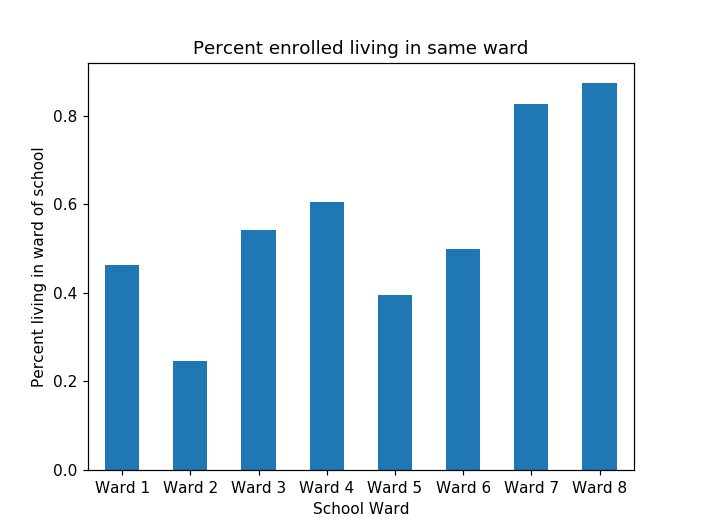

In [23]:
%matplotlib notebook
from matplotlib import pyplot as plt
ax = ward1.plot.bar(x='School Ward 2016-17', y='% living in School Ward 2016-17', rot=0)

In [24]:
plt.title("Percent enrolled living in same ward")
plt.xlabel("School Ward")
plt.ylabel("Percent living in ward of school")

Text(46.81944598754247, 0.5, 'Percent living in ward of school')

In [26]:
plt.savefig(r"C:\Users\tommy\OneDrive\Documents\Project 1\LivingInWard.png")